### 1. Loding Required Libraries

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. About Dataset

#### 2.1 Loading Dataset into Pandas DataFrame

In [307]:
data = pd.read_csv("../datasets/diabetes_data_upload.csv")
data.loc[:,'class'] = data.loc[:,'class'].map({"Positive":1, "Negative":0})
data.head()

C:\Users\Akash\AppData\Local\Temp\ipykernel_17484\834836905.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,'class'] = data.loc[:,'class'].map({"Positive":1, "Negative":0})


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,1
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,1
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,1
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,1
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1


#### 2.2 Number of Row and Columns

In [308]:
rows = data.shape[0]
cols = data.shape[1]

print(f"This dataset has \033[1m {rows} rows\033[0m and \033[1m{cols} columns \033[0m.")

This dataset has  520 rows and 17 columns .


#### 2.3 Null Values in Dataset

In [309]:
[[features, data[features].isnull().sum()] for features in data.columns if data[features].isnull().sum() > 0]

[]

#### 2.4 Heatmap of Missing Values

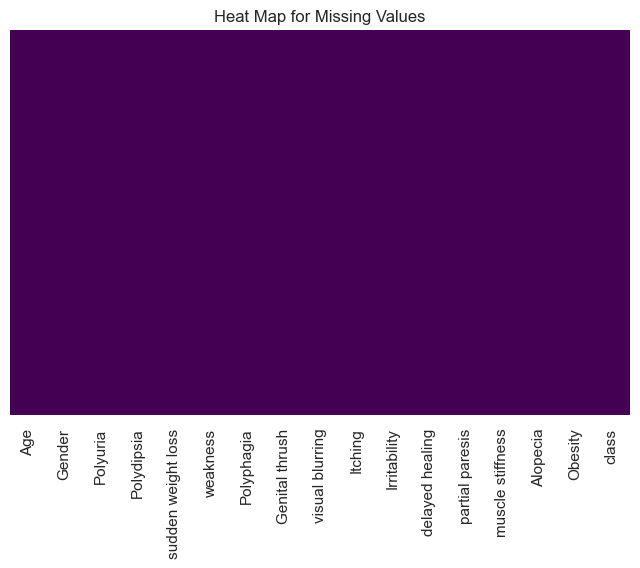

In [310]:
fig = sns.set(rc={'figure.figsize': (8, 5)})
plt.title("Heat Map for Missing Values")
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

**Observation**

There are no missing values.

### 3. Modeling

#### 3.1 Analyzing Target 

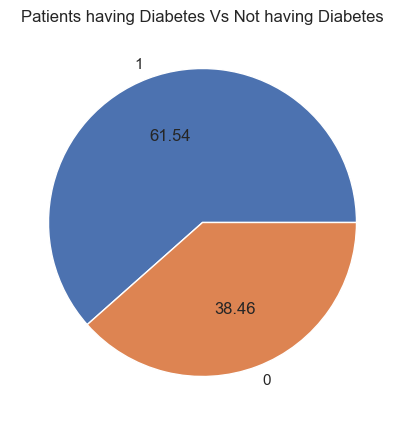

In [311]:
fig = sns.set(rc={'figure.figsize': (5, 5)})
plt.title("Patients having Diabetes Vs Not having Diabetes")
plt.pie(data['class'].value_counts(),labels=data['class'].unique(), autopct='%.2f')
plt.show()

#### 3.2 Import Required Libraries for Modeling

In [312]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from numpy import sqrt, argmax

In [313]:
data[categorical_columns]

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes
1,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No
2,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No
3,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No
4,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No
516,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No
517,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes
518,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No


#### 3.4 Pipeline

##### 3.4.1 One Hot Encoding

In [314]:
categorical_columns = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

ohe = OneHotEncoder()
ohe.fit(data[categorical_columns])

OneHotEncoder()

In [315]:
column_trans = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_), categorical_columns),
    remainder='passthrough'
)

##### 3.4.2 Scaling

In [316]:
scaler = StandardScaler(with_mean=False)
# scaler = MinMaxScaler()

##### 3.4.3 Classification Models

In [317]:
lr = LogisticRegression()
rfc = RandomForestClassifier(
    max_depth=5, 
    n_estimators=10
)

##### 3.4.4 Pipe Structure

In [318]:
pipe = make_pipeline(column_trans, scaler, rfc)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Female', 'Male'], dtype=object),
                                                                            array(['No', 'Yes'], dtype=object),
                                                                            array(['No', 'Yes'], dtype=object),
                                                                            array(['No', 'Yes'], dtype=object),
                                                                            array(['No', 'Yes'], dtype=object),
                                                                            array(['No', 'Yes'], dtype=object),
                                                                            array(['No'...
                                                                            array(['No', 'Yes'], dtype=object)]),
                                                  ['Gender', 'Polyuria',
                                                   'Polydipsia',
                                                   'sudden weight loss',
                                                   'weakness', 'Polyphagia',
                                                   'Genital thrush',
                                                   'visual blurring', 'Itching',
                                                   'Irritability',
                                                   'delayed healing',
                                                   'partial paresis',
                                                   'muscle stiffness',
                                                   'Alopecia', 'Obesity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, n_estimators=10))])

In [319]:
X = data.drop('class', axis=1)
y = data['class']

In [320]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [321]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Female', 'Male'], dtype=object),
                                                                            array(['No', 'Yes'], dtype=object),
                                                                            array(['No', 'Yes'], dtype=object),
                                                                            array(['No', 'Yes'], dtype=object),
                                                                            array(['No', 'Yes'], dtype=object),
                                                                            array(['No', 'Yes'], dtype=object),
                                                                            array(['No'...
                                                                            array(['No', 'Yes'], dtype=object)]),
                                                  ['Gender', 'Polyuria',
                                                   'Polydipsia',
                                                   'sudden weight loss',
                                                   'weakness', 'Polyphagia',
                                                   'Genital thrush',
                                                   'visual blurring', 'Itching',
                                                   'Irritability',
                                                   'delayed healing',
                                                   'partial paresis',
                                                   'muscle stiffness',
                                                   'Alopecia', 'Obesity'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, n_estimators=10))])

#### 3.5 Trainer Function

In [322]:
def trainer(data, Target, oversample, test_size, pipe):

    if oversample:
        # Class count
        class_count = data[Target].value_counts()

        # for oversampling getting the max count
        max_class = max(class_count)

        # Divide DataFrame by Dataset
        df_class_0 = data[data[Target] == 0]
        df_class_1 = data[data[Target] == 1]

        #Oversampling
        df_class_0_over = df_class_0.sample(max_class,replace = True)
        df_class_1_over = df_class_1.sample(max_class,replace = True)

        data = pd.concat([df_class_0_over, df_class_1_over], axis = 0)
        print("Done Oversampling.")

    plt. figure(figsize=(3,3))
    data[Target].value_counts().plot(kind='bar', title='Count (target)')
    plt.show()

    # Split into Dependent and Independent
    X = data.drop(Target, axis=1)
    y = data[Target]
    print("Splitted data into X and Y.")
    
    X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    print("Splitted data into Train and Test.")

    pipe.fit(X_train, Y_train)
    print("Model Fit Successfully!")
    
    y_pred = pipe.predict(x_test)

    y_pred_prob = pipe.predict_proba(x_test)
    
    roc_auc = round(roc_auc_score(y_test, y_pred_prob[:, 1]), 2)

    print(f"\n\033[1mROC-AUC Score\033[0m \t\t: {roc_auc*100} %")

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1], pos_label=1)
        
    # calculate the g-mean for each threshold
    gmeans = sqrt(tpr * (1-fpr))

    # locate the index of the largest g-mean
    ix = argmax(gmeans)
    print('\033[1mBest Threshold\033[0m \t\t: %.3f' % (thresholds[ix]))
    print('\033[1mG-Mean\033[0m \t\t\t: %.3f' % (gmeans[ix]))

    y_pred = (y_pred > thresholds[ix])

    accuracy = accuracy_score(y_test, y_pred)
    print("\033[1mModel Accuracy\033[0m \t\t:", round(accuracy,2,)*100, "%")

    print("\033[1m\nClassification Report:\033[0m")
    print(classification_report(y_test, y_pred))

    plt.figure()
    plt.plot(fpr, tpr, label='(area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

    fig = sns.set(rc={'figure.figsize': (5, 5)})
    plt.title("Confusion Matrix")
    cm=confusion_matrix(y_test, y_pred)
    sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Truth')
    plt.ylabel('Prediction')
    plt.show()

    return pipe    

### 4. Experiments

#### 4.1 Experiment Number 1

Done Oversampling.


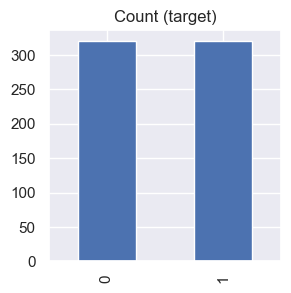

Splitted data into X and Y.
Splitted data into Train and Test.
Model Fit Successfully!

ROC-AUC Score 		: 98.0 %
Best Threshold 		: 0.404
G-Mean 			: 0.943
Model Accuracy 		: 93.0 %

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       256
           1       0.99      0.88      0.93       256

    accuracy                           0.93       512
   macro avg       0.94      0.93      0.93       512
weighted avg       0.94      0.93      0.93       512



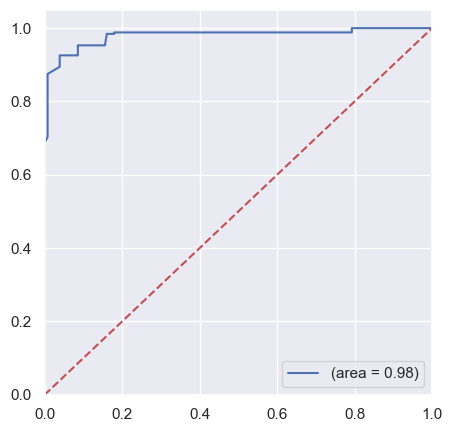

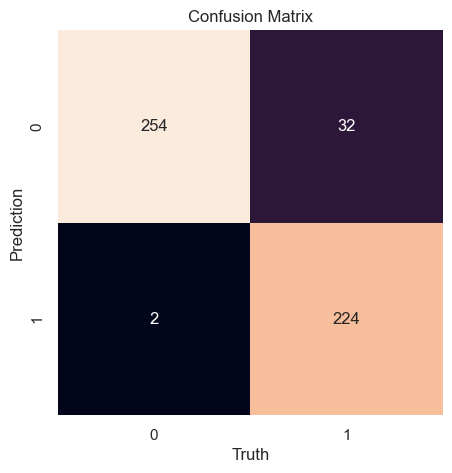

In [323]:
pipe = trainer(
    data=data, 
    Target='class', 
    oversample=True, 
    test_size=0.8,
    pipe=pipe
)

#### 4.2 Experiment Number 2

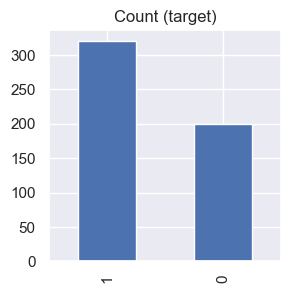

Splitted data into X and Y.
Splitted data into Train and Test.
Model Fit Successfully!

ROC-AUC Score 		: 100.0 %
Best Threshold 		: 0.370
G-Mean 			: 0.977
Model Accuracy 		: 95.0 %

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        94
           1       1.00      0.92      0.96       166

    accuracy                           0.95       260
   macro avg       0.94      0.96      0.95       260
weighted avg       0.96      0.95      0.95       260



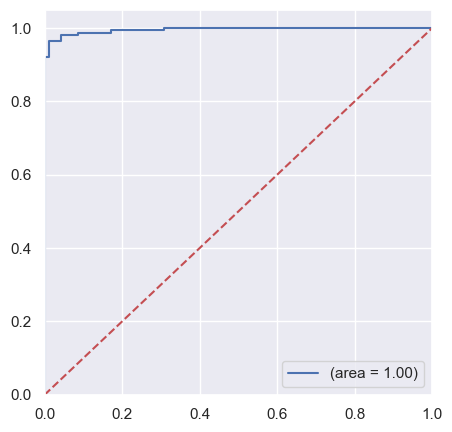

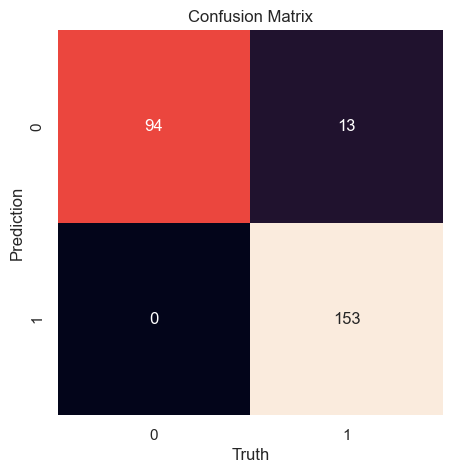

In [324]:
pipe = trainer(
    data=data, 
    Target='class', 
    oversample=False, 
    test_size=0.5,
    pipe=pipe
)

#### 4.3 Experiment Number 3

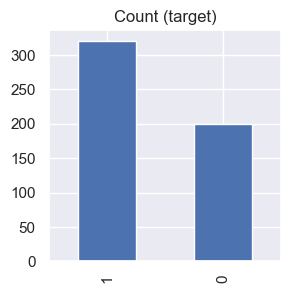

Splitted data into X and Y.
Splitted data into Train and Test.
Model Fit Successfully!

ROC-AUC Score 		: 99.0 %
Best Threshold 		: 0.442
G-Mean 			: 0.962
Model Accuracy 		: 94.0 %

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.97      0.94      0.96        71

    accuracy                           0.94       104
   macro avg       0.93      0.94      0.93       104
weighted avg       0.94      0.94      0.94       104



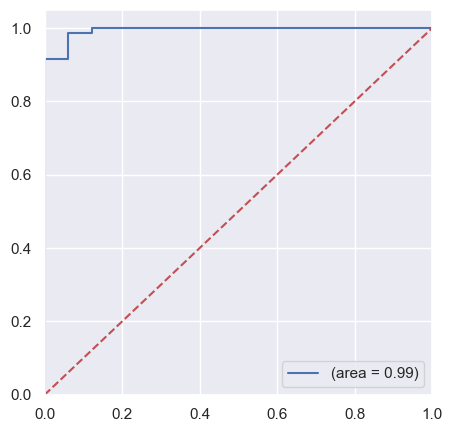

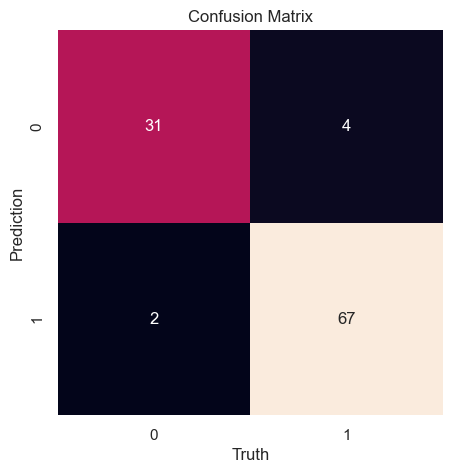

In [325]:
pipe = trainer(
    data=data, 
    Target='class', 
    oversample=False, 
    test_size=0.2,
    pipe=pipe
)

#### 4.4 Experiment Number 4

Done Oversampling.


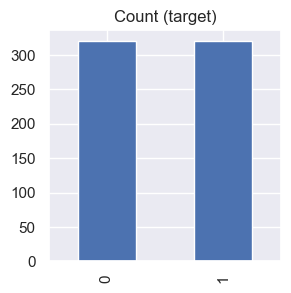

Splitted data into X and Y.
Splitted data into Train and Test.
Model Fit Successfully!

ROC-AUC Score 		: 99.0 %
Best Threshold 		: 0.341
G-Mean 			: 0.936
Model Accuracy 		: 92.0 %

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       171
           1       0.93      0.90      0.91       149

    accuracy                           0.92       320
   macro avg       0.92      0.92      0.92       320
weighted avg       0.92      0.92      0.92       320



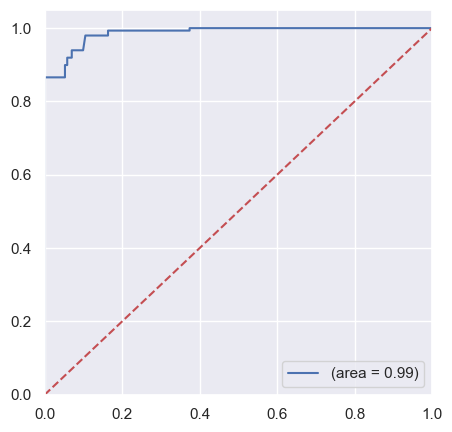

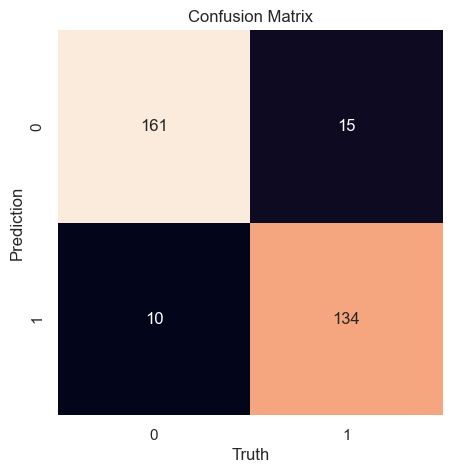

In [326]:
pipe = trainer(
    data=data, 
    Target='class', 
    oversample=True, 
    test_size=0.5,
    pipe=pipe
)

### 5. Saving the Model

In [327]:
import pickle

save_data = {"model": pipe}

pickle.dump(save_data,open('../model/Diabetes.pkl','wb'))